https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [17]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

generate data points

(150, 2)


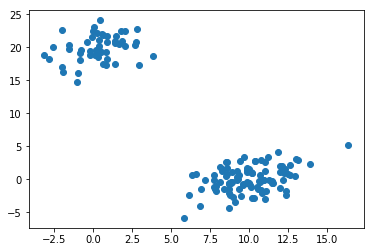

In [3]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

Perform the Hierarchical Clustering

In [4]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [6]:
Z.shape

(149, 4)

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9800148387574268

Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

We can see that ach row of the resulting array has the format [idx1, idx2, dist, sample_count].

In [14]:
Z[0]

array([52.     , 53.     ,  0.04151,  2.     ])

Let's have a look at the first 20 iterations:

In [22]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

We can observe that until iteration 13 the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance.

In iteration 13 the algorithm decided to merge cluster indices 62 with 152. If you paid attention the 152 should astonish you as we only have original sample indices 0 to 149 for our 150 samples. All indices idx >= len(X) actually refer to the cluster formed in Z[idx - len(X)].

This means that while idx 149 corresponds to X[149] that idx 150 corresponds to the cluster formed in Z[0], idx 151 to Z[1], 152 to Z[2], .

In [26]:
np.c_[Z[:20], np.arange(20)]

array([[ 52.     ,  53.     ,   0.04151,   2.     ,   0.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ,   1.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ,   3.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ,   4.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ,   5.     ],
       [108.     , 131.     ,   0.11007,   2.     ,   6.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ,   7.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ,   8.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ,   9.     ],
       [107.     , 115.     ,   0.12167,   2.     ,  10.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ,  11.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ,  12.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ,  13.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ,  14.     ],
       [ 10.     ,  83.     ,   0.18635,

plot dendrogram

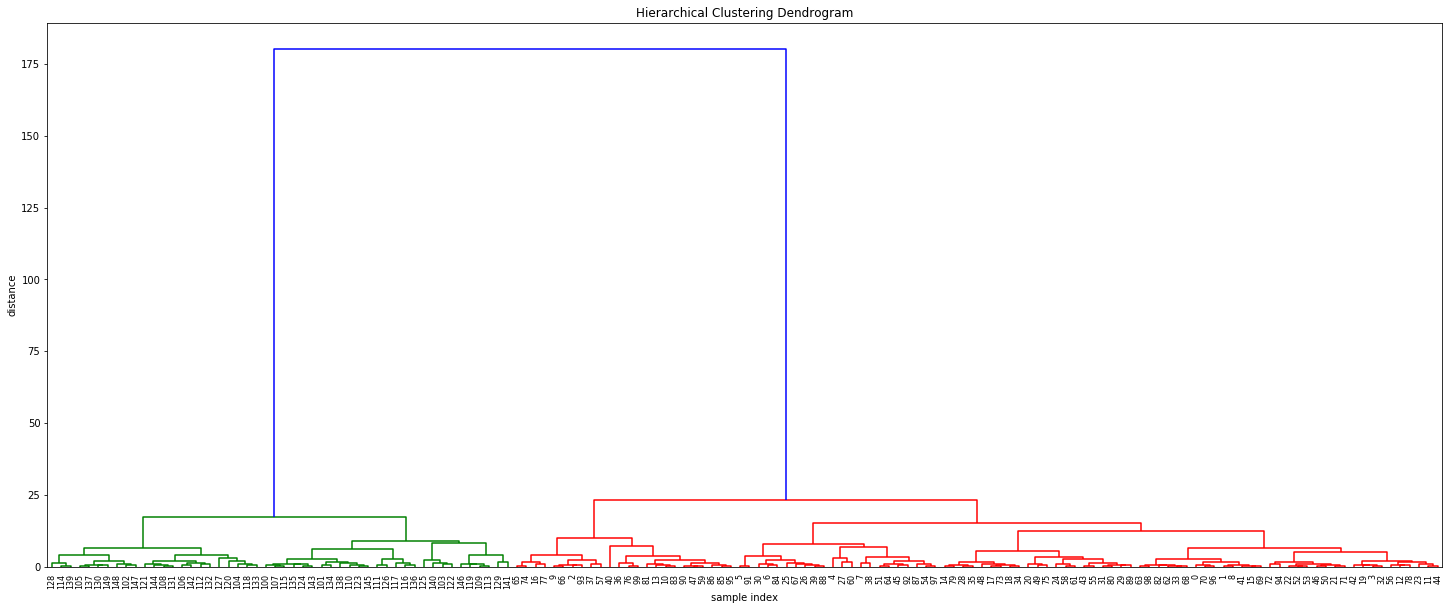

In [27]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()